In [13]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor



In [15]:
con_df = pd.read_csv("Concrete_Data.csv")

In [17]:
con_df.columns

Index(['Cement', 'Blast', 'Fly', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age', 'Strength'],
      dtype='object')

In [19]:
X = con_df.drop('Strength',axis=1)
y = con_df[['Strength']]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.3)

In [23]:
# tree algo mostly don't need scaling

In [25]:
dtr = DecisionTreeRegressor(random_state = 24)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.83089474226832


## GridSearchCV

In [76]:
dtr = DecisionTreeRegressor(random_state = 24)


params = {'min_samples_split':[2,3,4,5,6,10,25,50],
          'min_samples_leaf':[1,2,5,6,7,10,25,50],
          'max_depth':[None,4,6]
         }
kfold = KFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(dtr,param_grid = params,scoring = 'r2',
                   cv = kfold, verbose = 3)

In [78]:
gcv.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.798 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.876 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.878 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.789 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.797 total time=   0.0s
[CV 5/5] END max_de

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 2, 5, 6, 7, 10, 25, 50],
                         'min_samples_split': [2, 3, 4, 5, 6, 10, 25, 50]},
             scoring='r2', verbose=3)

In [79]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8580807204193125


In [80]:
gcv.best_estimator_

DecisionTreeRegressor(min_samples_leaf=2, random_state=24)

In [66]:
best_model = gcv.best_estimator_

In [68]:
#best_model.fit(X_train,y_train)

In [70]:
df_imp = pd.DataFrame({'feature':list(X.columns),
             'importance': best_model.feature_importances_})

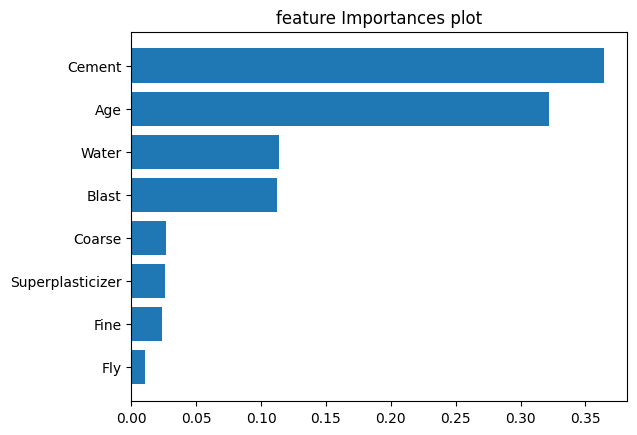

In [72]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()

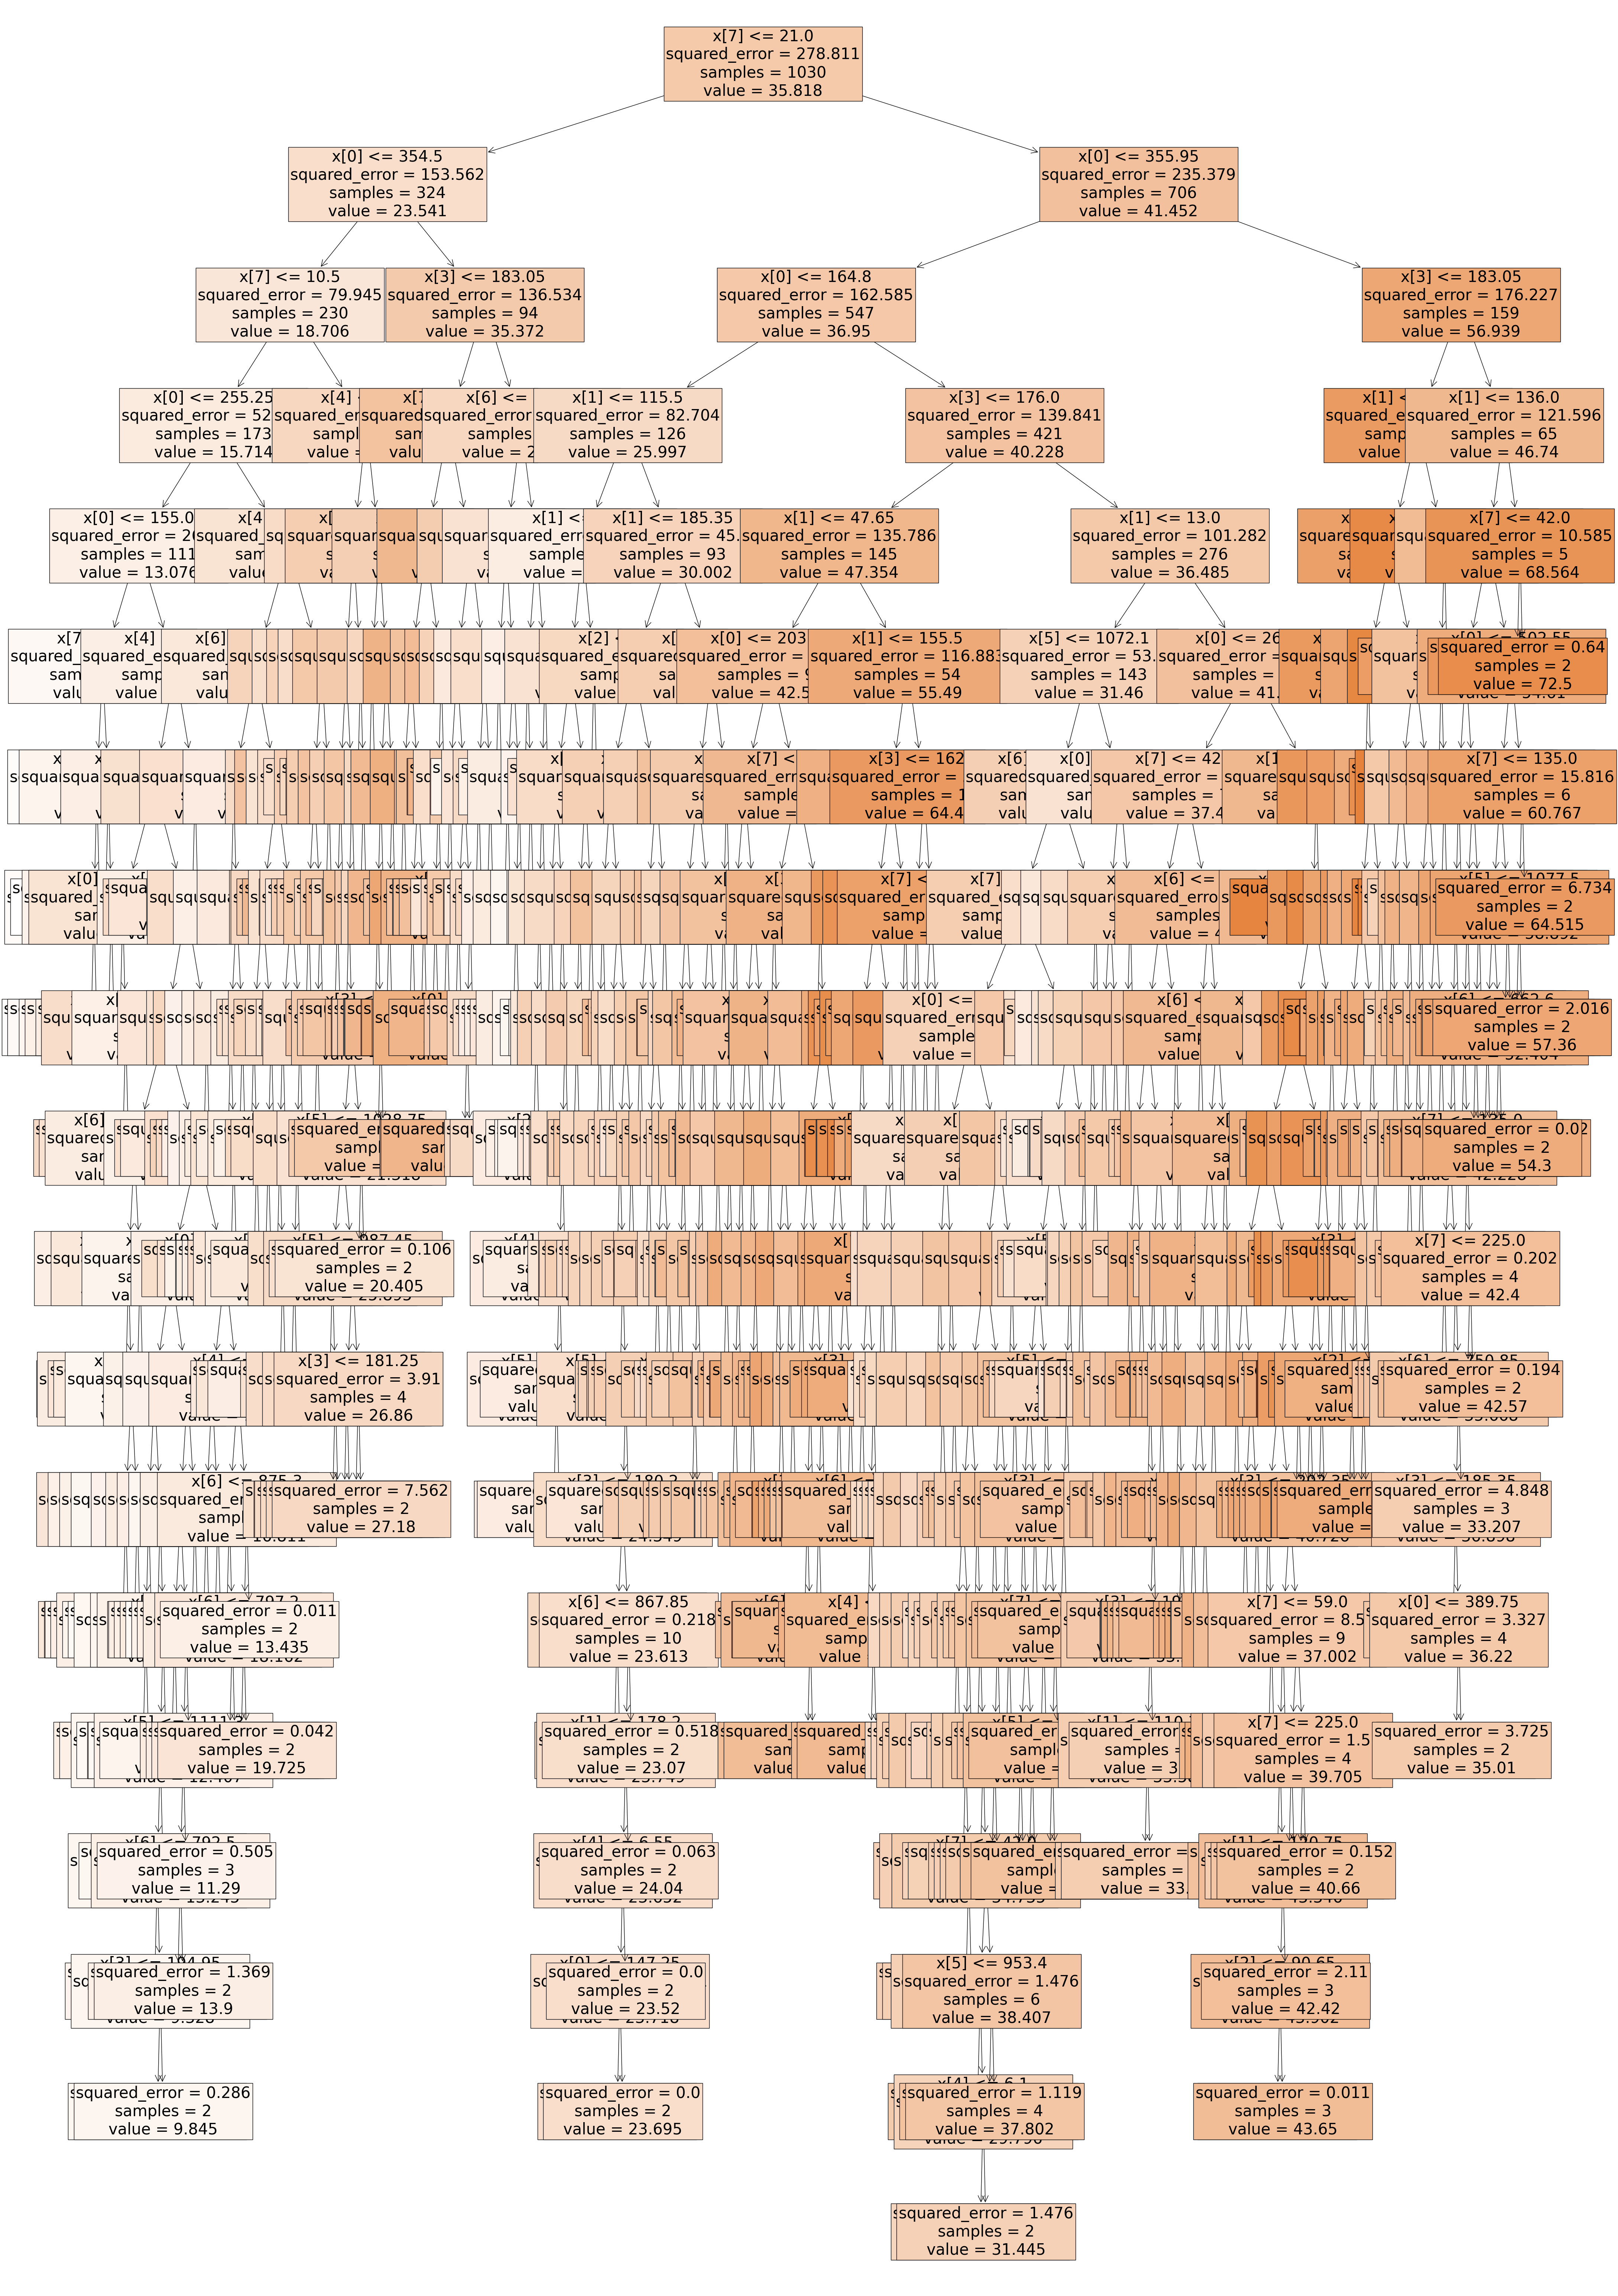

In [74]:

plt.figure(figsize=(50,80))
plot_tree(best_model, filled = True, fontsize= 30)
plt.show()